In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error

# Import the models
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR


In [24]:
# change for clean or unclean
file_name = "../data/data_without_outliers.csv"
df = pd.read_csv(file_name)

In [25]:
# Define features (X) and target (y)
# We drop StartupID as it's an identifier, not a predictive feature.
X = df.drop(columns=["StartupID", "Success Score"])
y = df["Success Score"]

# Calculate Mutual Information scores to find the most predictive features
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)

# Select the top 15 features
top_features = mi_scores.sort_values(ascending=False).head(15).index.tolist()

print("Top 15 features selected based on Mutual Information:")
print(top_features)

# Create the final feature set with only the top predictors
X = X[top_features]

print(f"\nFinal feature set shape: {X.shape}")

Top 15 features selected based on Mutual Information:
['Founded Year', 'IPO?', 'Log_Annual Revenue ($M)', 'Log_Number of Employees', 'Industry_Energy', 'Industry_E-commerce', 'Uses_Java', 'Industry_AI', 'Uses_AI', 'Log_Valuation ($B)', 'Industry_Logistics', 'Log_Social Media Followers', 'Industry_FinTech', 'Log_Revenue per Employee', 'Funding Stage_Seed']

Final feature set shape: (3471, 15)


In [26]:
# split into 80/20 train and test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("--- Data Split Complete ---")
print(f"Training set size: {len(X_train)} rows")
print(f"Testing set size: {len(X_test)} rows")
print("\n" + "=" * 50 + "\n")

--- Data Split Complete ---
Training set size: 2776 rows
Testing set size: 695 rows




This is where it becomes different based on model

In [27]:
rfr = RandomForestRegressor(
    n_estimators=100, max_depth=3, random_state=42
)

# Train the model
rfr.fit(X_train, y_train)

# Make predictions on the test set
rfr_predictions = rfr.predict(X_test)

# Evaluate the model
rfr_mae = mean_absolute_error(y_test, rfr_predictions)
rfr_r2 = r2_score(y_test, rfr_predictions)
rfr_mse = mean_squared_error(y_test, rfr_predictions)
rfr_rmse = root_mean_squared_error(y_test, rfr_predictions)
print(f"Random Forest Reg MAE: {rfr_mae:.4f}")
print(f"Random Forest Reg MSE: {rfr_mse:.4f}")
print(f"Random Forest Reg R-squared: {rfr_r2:.4f}")
print(f"Random Forest Reg RMSE: {rfr_rmse:.4f}")

Random Forest Reg MAE: 2.2845
Random Forest Reg MSE: 6.8466
Random Forest Reg R-squared: -0.0087
Random Forest Reg RMSE: 2.6166


Feature Importance Ranking:
                       Feature  Importance
0                 Founded Year    0.074594
1                         IPO?    0.002136
2      Log_Annual Revenue ($M)    0.180980
3      Log_Number of Employees    0.211182
4              Industry_Energy    0.000000
5          Industry_E-commerce    0.007138
6                    Uses_Java    0.010411
7                  Industry_AI    0.019696
8                      Uses_AI    0.003813
9           Log_Valuation ($B)    0.185565
10          Industry_Logistics    0.001084
11  Log_Social Media Followers    0.134729
12            Industry_FinTech    0.007534
13    Log_Revenue per Employee    0.150338
14          Funding Stage_Seed    0.010800


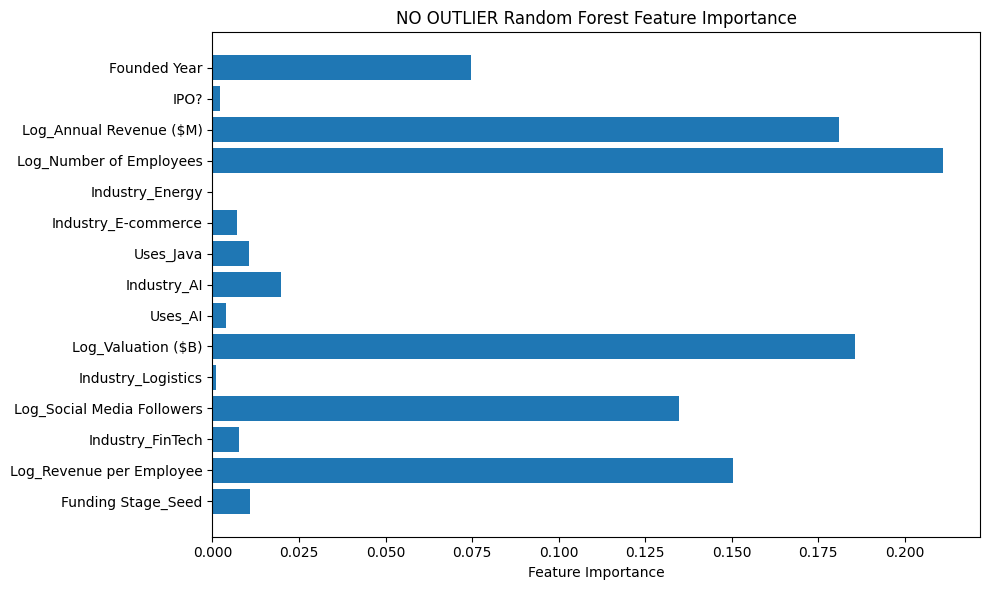

In [29]:
importances = rfr.feature_importances_
feat_imp_df = pd.DataFrame ({
    'Feature': X_train.columns,
    'Importance': importances
}) 
feat_imp_df.sort_values(by = 'Importance', ascending=False )

print("Feature Importance Ranking:")
print(feat_imp_df)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.gca().invert_yaxis()  # To show the highest importance at the top
plt.xlabel('Feature Importance')
plt.title('NO OUTLIER Random Forest Feature Importance')
plt.tight_layout()
plt.show()

Results:

RandomForest MAE: 2.2845

RandomForest MSE: 6.8466

RandomForest R-squared: -0.0087

RandomForest RMSE: 2.6166